Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   

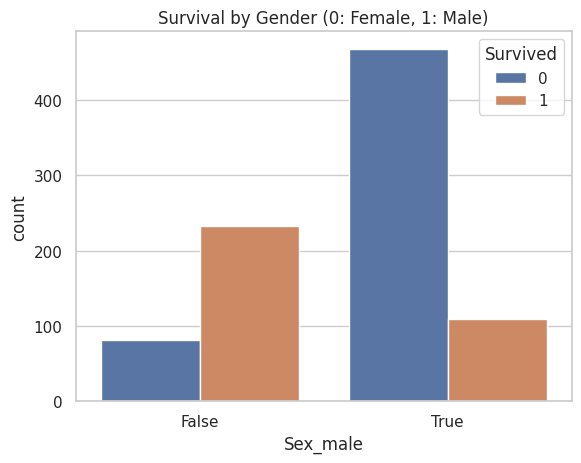

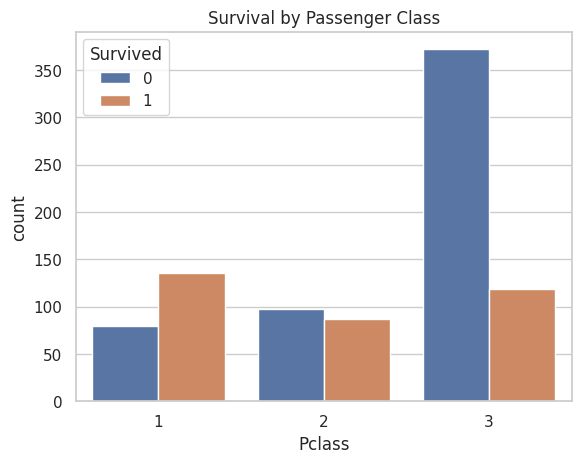

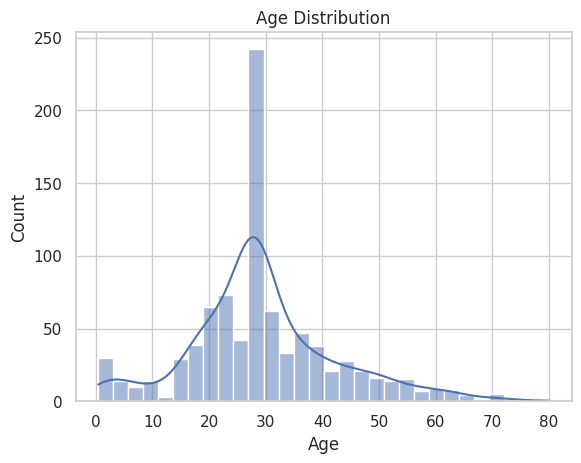

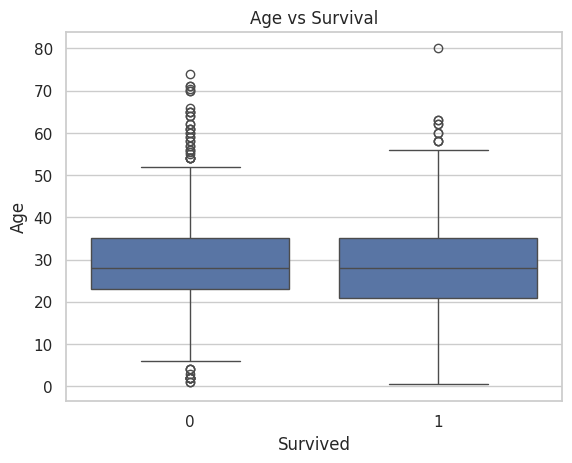

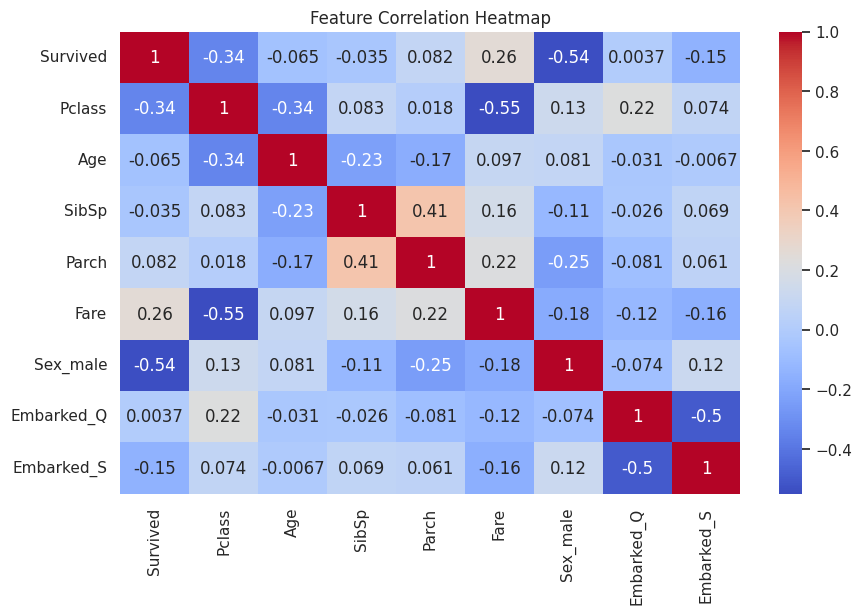

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('train.csv')  # Update path if needed

# Basic info
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data Cleaning
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Categorical encoding (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


# Categorical overview
print("\nValue Counts:")
print(df['Sex_male'].value_counts())
print(df['Embarked_Q'].value_counts())
print(df['Embarked_S'].value_counts())
print(df['Pclass'].value_counts())


# Visualizations
sns.set(style="whitegrid")

# 1. Survival by Gender (using the encoded column)
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title('Survival by Gender (0: Female, 1: Male)')
plt.show()

# 2. Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# 3. Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 4. Boxplot: Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

# 5. Heatmap: Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 6. Pairplot
sns.pairplot(df, hue='Survived')
plt.suptitle('Pairplot of Titanic Features', y=1.02)
plt.show()

# Summary
print("\nKey Observations:")
print("- Women had a significantly higher survival rate.")
print("- First-class passengers were more likely to survive.")
print("- Younger passengers had slightly better survival odds.")
print("- Embarked location shows minor influence on survival.")